## I Phase 1 Milestone 2 Preface

Introduction chapter filled with : 
1. Identity
2. Big picture of the dataset
3. Goals want to achieve

Identity

- Name : Syahrul Budi Rahmadan 

- Batch : 002 - SBY

- Program : FTDS

- GitHub : [SyahrulRahmadan](https://github.com/SyahrulRahmadan)

- Email : syahrulbudirahmadan@gmail.com

Dataset Big Picture

- [DatasetLink](https://www.kaggle.com/datasets/jacksondivakarr/student-classification-dataset)

In general, this dataset tells about students' final grade reports at a school in the semester they have taken. The dataset contains values such as study hours, scholarship level, and much more.

As a Data Scientist, I will create a model that can predict the values determined by the school in order to free up the teacher's time for overall assessment.

Short Story :


One day I, a data scientist, was recruited by a school to work at the school. The school is struggling because the semester is ending. In the even 2023/2024 academic year, the school has 5 times as many students as other schools, but the ratio of teaching staff is very low so they need a data scientist like me to create a program that can predict grades quickly and reliably for the future. If successful, this can increase the productivity level of teaching staff so that they don't have to spend a long time assessing the final grades for each student

Why make this project ?

- Assist teachers in assessing final grades
- Cutting teacher work time so teachers can focus on other things
- Implementing new machine learning models in the school

Goals

- Analyze the dataset provided by the school
- Create a model that can automatically create final grades for students
- Take up the teacher's time to assess each student's final grade

## II Libraries

In [85]:
# For table querying and mathematical
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Feature Engineering library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder

In [87]:
# Data Balancing
from imblearn.over_sampling import SMOTENC

In [88]:
# For Pipeline and Column Transformer
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [89]:
# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
# For Multiclass
from sklearn.multiclass import OneVsRestClassifier

In [91]:
# Metric
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, f1_score, classification_report, r2_score, mean_absolute_error

In [92]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [93]:
# For Model exporting and importing
import pickle

In [94]:
import time

import warnings
warnings.filterwarnings('ignore')

## III Data Loading

In [95]:
data = pd.read_csv("student_dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          145 non-null    int64 
 1   Id                  145 non-null    int64 
 2   Student_Age         145 non-null    int64 
 3   Sex                 145 non-null    object
 4   High_School_Type    145 non-null    object
 5   Scholarship         144 non-null    object
 6   Additional_Work     145 non-null    object
 7   Sports_activity     145 non-null    object
 8   Transportation      145 non-null    object
 9   Weekly_Study_Hours  145 non-null    int64 
 10  Attendance          145 non-null    object
 11  Reading             145 non-null    object
 12  Notes               145 non-null    object
 13  Listening_in_Class  145 non-null    object
 14  Project_work        145 non-null    object
 15  Grade               145 non-null    object
dtypes: int64(4), object(12)
me

In [96]:
data = data.drop('Unnamed: 0', axis=1)

In [97]:
data

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,5141,22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,5142,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,5143,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
143,5144,22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB


In [98]:
print("Before Missing Values in DataFrame:")
print(data.isnull().sum())

Before Missing Values in DataFrame:
Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           1
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64


In [99]:
data = data.dropna()

In [100]:
print("After Handling Missing Values in DataFrame:")
print(data.isnull().sum())

After Handling Missing Values in DataFrame:
Id                    0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64


In [101]:
# Cek drop duplicate
data = data.drop_duplicates()

In [102]:
print("After Handling Missing Values in DataFrame:")
print(data.info())

After Handling Missing Values in DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 144
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  144 non-null    int64 
 1   Student_Age         144 non-null    int64 
 2   Sex                 144 non-null    object
 3   High_School_Type    144 non-null    object
 4   Scholarship         144 non-null    object
 5   Additional_Work     144 non-null    object
 6   Sports_activity     144 non-null    object
 7   Transportation      144 non-null    object
 8   Weekly_Study_Hours  144 non-null    int64 
 9   Attendance          144 non-null    object
 10  Reading             144 non-null    object
 11  Notes               144 non-null    object
 12  Listening_in_Class  144 non-null    object
 13  Project_work        144 non-null    object
 14  Grade               144 non-null    object
dtypes: int64(3), object(12)
memory usag

## IV Dataset Analysis (EDA I)

As is known from the previous story, we have to know what factors really influence the final grade for each student. So let's look at top  10 table first

In [103]:
data.head(10)

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
5,5006,20,Male,State,50%,No,No,Private,2,Always,Yes,No,Yes,Yes,BA
6,5007,18,Male,State,75%,No,No,Private,0,Always,No,Yes,Yes,Yes,CC
7,5008,18,Female,State,50%,Yes,Yes,Bus,2,Sometimes,No,Yes,Yes,Yes,BA
8,5009,19,Female,Other,50%,No,Yes,Bus,0,Always,No,No,No,Yes,CC
9,5010,21,Female,State,50%,No,No,Bus,12,Never,No,Yes,No,No,Fail


Now we must look at the ratio of each grade, so we must know the unique value of it

Since ID is had all the unique values, we must drop it first

In [104]:
column_to_drop = 'Id'
data_no_id = data.drop(column_to_drop, axis=1)

now we already drop 'Id' Column, so now we can look for each unique values for it for each object or catagorical data

In [105]:
for column in data_no_id.columns:
    unique_values = data_no_id[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in Student_Age: [21 20 18 22 19 26 25 24 23]
Unique values in Sex: ['Male' 'Female']
Unique values in High_School_Type: ['Other' 'State' 'Private']
Unique values in Scholarship: ['50%' '75%' '100%' '25%']
Unique values in Additional_Work: ['Yes' 'No']
Unique values in Sports_activity: ['No' 'Yes']
Unique values in Transportation: ['Private' 'Bus']
Unique values in Weekly_Study_Hours: [ 0  2 12  8]
Unique values in Attendance: ['Always' 'Never' 'Sometimes']
Unique values in Reading: ['Yes' 'No']
Unique values in Notes: ['Yes' 'No']
Unique values in Listening_in_Class: ['No' 'Yes']
Unique values in Project_work: ['No' 'Yes']
Unique values in Grade: ['AA' 'BA' 'CC' 'Fail' 'BB' 'CB' 'DD' 'DC']


So we all know that 'Grade' column is the most important things we can do reseach for it. because this column is the result of all the previous columns. Therefore we will look at the ratio for each existing grade

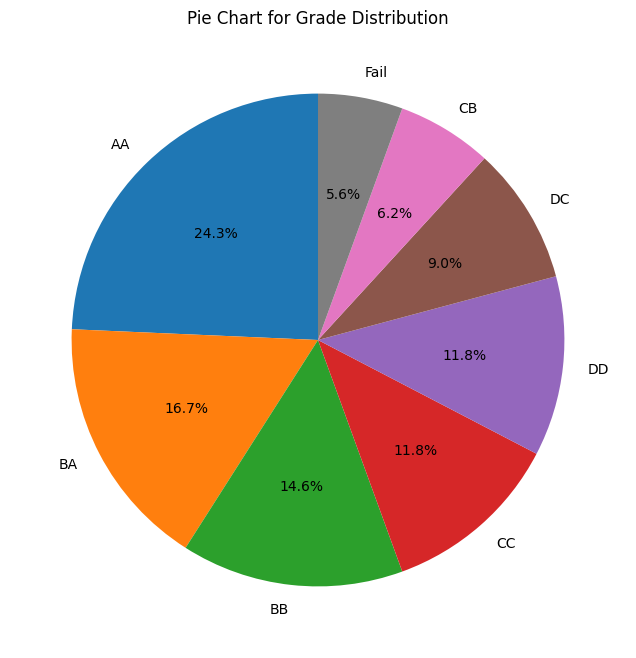

In [106]:
category_counts = data['Grade'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for Grade Distribution')
plt.show()

In [107]:
# Grouping the DataFrame by the 'Category' column
grouped_df = data.groupby('Grade')

# Create a dictionary to store DataFrames for each category
category_dataframes = {}

# Loop through each group and store the first 5 rows in a new DataFrame
for category, group in grouped_df:
    category_dataframes[category] = group.head(5)

# Accessing the new DataFrames for each category
for category, dataframe in category_dataframes.items():
    print(f"Table for Grade Category {category}:\n")
    print(dataframe)
    print("\n" + "="*30 + "\n")

Table for Grade Category AA:

     Id  Student_Age     Sex High_School_Type Scholarship Additional_Work   
0  5001           21    Male            Other         50%             Yes  \
1  5002           20    Male            Other         50%             Yes   
2  5003           21    Male            State         50%              No   
3  5004           18  Female          Private         50%             Yes   
4  5005           22    Male          Private         50%              No   

  Sports_activity Transportation  Weekly_Study_Hours Attendance Reading Notes   
0              No        Private                   0     Always     Yes   Yes  \
1              No        Private                   0     Always     Yes    No   
2              No        Private                   2      Never      No    No   
3              No            Bus                   2     Always      No   Yes   
4              No            Bus                  12     Always     Yes    No   

  Listening_in_Class

After researching, there are several factors that can influence the value, such as:
- Project work
- Listen in class
- Study time
- Presence
- Sports activities/PJOK
- Carrying out additional assignments

And almost all columns will be used except ID because this column has its own unique value, therefore there are several assumptions from researchers, namely:
- Numerical data will be considered discrete data
- Categorical data has no hierarchy
- All columns will be featured in this experiment

without further EDA I Analysis, head to Feature Engineering

## V Feature Engineering

### Split Feature and Target

Drop Grade and Id from features and add Grade as main target

In [108]:
X = data.drop(['Grade', 'Id'], axis=1)
y = data['Grade']

### Split Train-test

In [109]:
# split data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=y)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
print('Train Size :', y_train.shape)
print('Test Size :', y_test.shape)

Train Size : (108, 13)
Test Size : (36, 13)
Train Size : (108,)
Test Size : (36,)


In [110]:
print (y.shape)

(144,)


Check the data balance

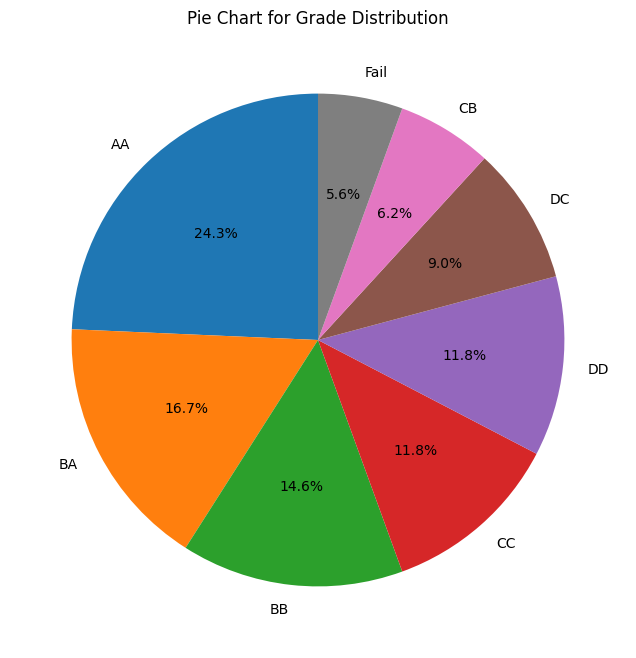

In [111]:
category_counts_y = y.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(category_counts_y, labels=category_counts_y.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for Grade Distribution')
plt.show()

In [112]:
X_train.head(10)

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work
7,18,Female,State,50%,Yes,Yes,Bus,2,Sometimes,No,Yes,Yes,Yes
116,21,Female,State,100%,No,No,Private,0,Always,Yes,Yes,Yes,No
100,18,Male,State,75%,No,No,Private,0,Sometimes,No,Yes,Yes,Yes
119,21,Female,State,75%,No,Yes,Private,0,Always,No,No,Yes,Yes
40,18,Male,Private,50%,No,No,Private,2,Always,Yes,No,Yes,Yes
16,18,Female,State,100%,No,Yes,Private,0,Always,Yes,No,No,No
127,18,Female,State,75%,No,No,Private,0,Never,No,No,No,Yes
118,18,Male,State,100%,No,Yes,Bus,0,Never,No,Yes,No,No
130,18,Female,State,50%,Yes,Yes,Private,0,Always,Yes,Yes,No,No
105,18,Male,State,75%,Yes,Yes,Private,0,Always,Yes,No,No,No


Since our data is not balance enough, lets do data balancing with SMOTENC

### Balancing Train Set

SMOTENC, which stands for Synthetic Minority Over-sampling Technique for Nominal and Continuous features, is an extension of the SMOTE (Synthetic Minority Over-sampling Technique) algorithm that is specifically designed to handle datasets with a mixture of categorical (nominal) and continuous features.

The key idea behind SMOTENC is to create synthetic examples for the minority class by considering both numerical and categorical attributes. It works by selecting a minority class example and its k-nearest neighbors (taking into account both numerical and categorical attributes), and then generating synthetic examples along the line segments connecting the chosen example to its neighbors.

In [113]:
smotenc = SMOTENC([1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12], random_state=42)
X_train, y_train = smotenc.fit_resample(X_train, y_train)
X_train.head()

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work
0,18,Female,State,50%,Yes,Yes,Bus,2,Sometimes,No,Yes,Yes,Yes
1,21,Female,State,100%,No,No,Private,0,Always,Yes,Yes,Yes,No
2,18,Male,State,75%,No,No,Private,0,Sometimes,No,Yes,Yes,Yes
3,21,Female,State,75%,No,Yes,Private,0,Always,No,No,Yes,Yes
4,18,Male,Private,50%,No,No,Private,2,Always,Yes,No,Yes,Yes


In [114]:
y_train.shape

(208,)

Check data balance using Pie Plot

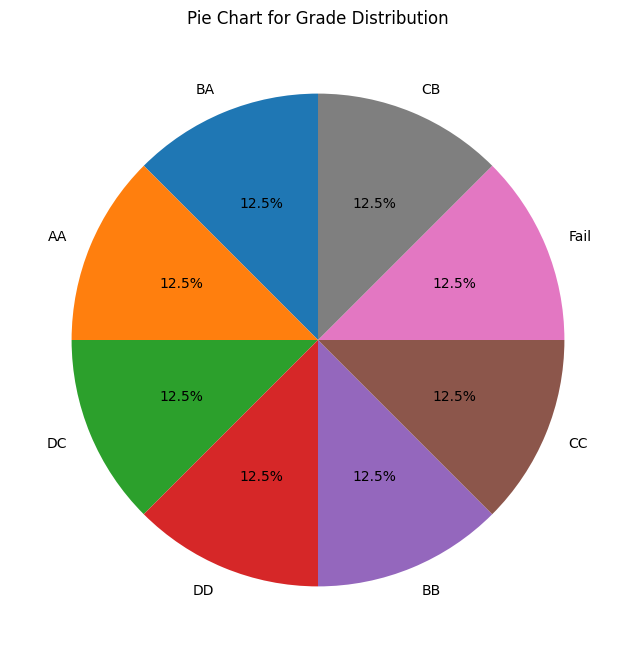

In [115]:
category_counts_y = y_train.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(category_counts_y, labels=category_counts_y.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for Grade Distribution')
plt.show()

After we do data balancing, now we can start split into numerical and catagorical column

In [116]:
# Split between numerical and catagorical

num_col = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(num_col)
print(cat_col)

['Student_Age', 'Weekly_Study_Hours']
['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work']


### Make pipelines for Encode - Scaler

pipeline is a way to streamline a lot of the routine processes, encapsulating them into a single workflow. It's a series of data processing steps, where each step is a tuple containing a name (string) and an instance of an estimator or transformer. The pipeline can be used to specify a linear sequence of data transformations and a final estimator.

In this case the pipeline will be used to make the data directly enter the preprocessing and algorithm that has been chosen

In [117]:
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer_1 = Pipeline([
    ('encodern', OneHotEncoder())
])

# define preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_col),
    ('cat', categorical_transformer_1, cat_col)
])

## VI Models Pipelines

### KNN

K-Nearest Neighbors (KNN) is a simple and widely used classification and regression algorithm in machine learning. It is a type of instance-based or lazy learning, where the model makes predictions based on the majority class (for classification) or the average (for regression) of the k-nearest data points in the feature space.

In [118]:
# Define the pipeline with preprocessing and classification steps
pipeline_KNN = Pipeline([
    ('preprocessor', preprocessor),
    ('classifierKNN', KNeighborsClassifier())
])

### SVM

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. SVM is particularly effective in high-dimensional spaces and is well-suited for scenarios where the decision boundary is complex and nonlinear.

In [119]:
# Define the pipeline with preprocessing and classification steps
pipeline_SVM = Pipeline([
    ('preprocessor', preprocessor),
    ('classifierSVM', SVC())
])

### Decision Tree Classifier

A Decision Tree Classifier is a supervised machine learning algorithm used for both classification and regression tasks. It is a tree-like model where an internal node represents a feature or attribute, each branch represents the outcome of the test on that feature, and each leaf node represents the class label or target value. Decision trees are particularly popular due to their simplicity, interpretability, and versatility.

In [120]:
# Define the pipeline with preprocessing and classification steps
pipeline_Tree = Pipeline([
    ('preprocessor', preprocessor),
    ('classifierTree', tree.DecisionTreeClassifier())
])

### Random Forest Classifier

Random Forest Classifier is an ensemble learning method based on the construction of a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It is one of the most powerful and widely used machine learning algorithms due to its robustness, flexibility, and high performance.

In [121]:
# Define the pipeline with preprocessing and classification steps
pipeline_RandomForest = Pipeline([
    ('preprocessor', preprocessor),
    ('classifierRandom', RandomForestClassifier())
])

### Gradient Boosting Classifier

Gradient Boosting is an ensemble learning technique that builds a series of weak learners (typically decision trees) and combines their predictions to create a stronger model. Gradient Boosting differs from Random Forests in that it builds trees sequentially, with each tree trying to correct the errors made by the previous ones. The most common form of Gradient Boosting is the Gradient Boosting Classifier for classification tasks.

In [122]:
pipeline_GradientBoosting = Pipeline([
    ('preprocessor', preprocessor),
    ('classifierGBoost', GradientBoostingClassifier())
])

## VII Model Training

In this section, we have to check if the steps from features, encode, scaler, and preprocessing is there

### KNN

In [123]:
KNN_Base = pipeline_KNN.fit(X_train,y_train)
print('Pipeline steps : ', pipeline_KNN.steps)
pipeline_KNN

Pipeline steps :  [('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Student_Age', 'Weekly_Study_Hours']),
                                ('cat',
                                 Pipeline(steps=[('encodern',
                                                  OneHotEncoder())]),
                                 ['Sex', 'High_School_Type', 'Scholarship',
                                  'Additional_Work', 'Sports_activity',
                                  'Transportation', 'Attendance', 'Reading',
                                  'Notes', 'Listening_in_Class',
                                  'Project_work'])])), ('classifierKNN', KNeighborsClassifier())]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Student_Age',
                                                   'Weekly_Study_Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'High_School_Type',
                                                   'Scholarship',
                                                   'Additional_Work',
                                                   'Sports_activity',
                                                   'Transportation',
                                                   'Attendance', 'Reading',
                                                   'Notes',
                                                   'Listening_in_Class',
                                                   'Project_work'])])),
                ('classifierKNN', KNeighborsClassifier())])

### SVM

In [124]:
SVM_Base = pipeline_SVM.fit(X_train,y_train)
print('Pipeline steps : ', pipeline_SVM.steps)
pipeline_SVM

Pipeline steps :  [('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Student_Age', 'Weekly_Study_Hours']),
                                ('cat',
                                 Pipeline(steps=[('encodern',
                                                  OneHotEncoder())]),
                                 ['Sex', 'High_School_Type', 'Scholarship',
                                  'Additional_Work', 'Sports_activity',
                                  'Transportation', 'Attendance', 'Reading',
                                  'Notes', 'Listening_in_Class',
                                  'Project_work'])])), ('classifierSVM', SVC())]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Student_Age',
                                                   'Weekly_Study_Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'High_School_Type',
                                                   'Scholarship',
                                                   'Additional_Work',
                                                   'Sports_activity',
                                                   'Transportation',
                                                   'Attendance', 'Reading',
                                                   'Notes',
                                                   'Listening_in_Class',
                                                   'Project_work'])])),
                ('classifierSVM', SVC())])

### Decision Tree

In [125]:
Tree_Base = pipeline_Tree.fit(X_train,y_train)
print('Pipeline steps : ', pipeline_Tree.steps)
pipeline_Tree

Pipeline steps :  [('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Student_Age', 'Weekly_Study_Hours']),
                                ('cat',
                                 Pipeline(steps=[('encodern',
                                                  OneHotEncoder())]),
                                 ['Sex', 'High_School_Type', 'Scholarship',
                                  'Additional_Work', 'Sports_activity',
                                  'Transportation', 'Attendance', 'Reading',
                                  'Notes', 'Listening_in_Class',
                                  'Project_work'])])), ('classifierTree', DecisionTreeClassifier())]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Student_Age',
                                                   'Weekly_Study_Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'High_School_Type',
                                                   'Scholarship',
                                                   'Additional_Work',
                                                   'Sports_activity',
                                                   'Transportation',
                                                   'Attendance', 'Reading',
                                                   'Notes',
                                                   'Listening_in_Class',
                                                   'Project_work'])])),
                ('classifierTree', DecisionTreeClassifier())])

### Random Forest

In [126]:
RandomForest_Base = pipeline_RandomForest.fit(X_train,y_train)
print('Pipeline steps : ', pipeline_RandomForest.steps)
pipeline_RandomForest

Pipeline steps :  [('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Student_Age', 'Weekly_Study_Hours']),
                                ('cat',
                                 Pipeline(steps=[('encodern',
                                                  OneHotEncoder())]),
                                 ['Sex', 'High_School_Type', 'Scholarship',
                                  'Additional_Work', 'Sports_activity',
                                  'Transportation', 'Attendance', 'Reading',
                                  'Notes', 'Listening_in_Class',
                                  'Project_work'])])), ('classifierRandom', RandomForestClassifier())]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Student_Age',
                                                   'Weekly_Study_Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'High_School_Type',
                                                   'Scholarship',
                                                   'Additional_Work',
                                                   'Sports_activity',
                                                   'Transportation',
                                                   'Attendance', 'Reading',
                                                   'Notes',
                                                   'Listening_in_Class',
                                                   'Project_work'])])),
                ('classifierRandom', RandomForestClassifier())])

### Gradient Boosting

In [127]:
GradientBoost_Base = pipeline_GradientBoosting.fit(X_train,y_train)
print('Pipeline steps : ', pipeline_GradientBoosting.steps)
pipeline_GradientBoosting

Pipeline steps :  [('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Student_Age', 'Weekly_Study_Hours']),
                                ('cat',
                                 Pipeline(steps=[('encodern',
                                                  OneHotEncoder())]),
                                 ['Sex', 'High_School_Type', 'Scholarship',
                                  'Additional_Work', 'Sports_activity',
                                  'Transportation', 'Attendance', 'Reading',
                                  'Notes', 'Listening_in_Class',
                                  'Project_work'])])), ('classifierGBoost', GradientBoostingClassifier())]


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Student_Age',
                                                   'Weekly_Study_Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'High_School_Type',
                                                   'Scholarship',
                                                   'Additional_Work',
                                                   'Sports_activity',
                                                   'Transportation',
                                                   'Attendance', 'Reading',
                                                   'Notes',
                                                   'Listening_in_Class',
                                                   'Project_work'])])),
                ('classifierGBoost', GradientBoostingClassifier())])

After checking all the steps in the pipeline, the data will be entered into the evaluation model

## VIII Model Evaluation (Base Model)

In this section, researchers will carry out a model evaluation. There are several model evaluations that have circulated in the world of machine learning, but researchers will carry out 2 model evaluation matrices, namely:
- Cross Validation Mean
- F1 Score for test and train

Cross Validation Mean :


Cross Validation Mean is the average value of the performance measurement results of the machine learning model in several iterations of cross-validation testing. Cross-validation is a model evaluation technique used to measure the extent to which a model can generalize on data that was not seen during training. Common performance metrics measured in cross-validation include accuracy, precision, recall, F1-score, and others, depending on the type of task (e.g., classification or regression).


In this case, the Cross Validation Mean determines how accurate the multiclass classification is by the algorithm. The higher the number, the better the model will be at predicting the results of several factors that the researchers have listed, such as:
- Project work
- Listen in class
- Study time
- Presence
- Sports activities/PJOK
- Carrying out additional assignments

F1 Score for test and train :


F1 Score is an evaluation metric that combines precision and recall. This is especially useful when there is an imbalance in the distribution of classes in the dataset. F1 Score for train and test is generally used to evaluate the performance of a machine learning model on two different data sets: one used for training the model (train) and the other to measure performance on data not seen during training (test).


In this case the researcher will check whether the model is overfit or underfit by looking at the F1 Score comparison in the Test-train, if the difference is further then the model is considered underfit and if it is closer + the value approaches 1/100%, then the model is considered overfit
- Overfit: The model is considered to only remember and not learn
- Underfit: The model learns but is considered not good enough to predict

In [128]:
eval_results = {
    'name': [],
    'Cross Validation Mean': [],
    'f1 Score - Train': [],
    'f1 Score - Test': []
}
def model_evaluation(name, accuracy_mean, f1_train, f1_test):


    eval_results['name'].append(name)
    eval_results['Cross Validation Mean'].append(accuracy_mean)
    eval_results['f1 Score - Train'].append(f1_train)
    eval_results['f1 Score - Test'].append(f1_test)

In [129]:
# Create a function to check the performance
def performance_check(clf, X, y_pred):
  y_pred = clf.predict(X)

  return cross_val_score(clf, X, y_pred, cv=5)

In [130]:
%%time
print('Cross-validation - Train : ', performance_check(pipeline_KNN, X_train, y_train))
print('Cross-validation - Test  : ', performance_check(pipeline_KNN, X_test, y_test))

accuracy = cross_val_score(pipeline_KNN, X_train, y_train, cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = pipeline_KNN.predict(X_train)
y_pred_test = pipeline_KNN.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('KNN Base', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Cross-validation - Train :  [0.73809524 0.78571429 0.83333333 0.87804878 0.90243902]
Cross-validation - Test  :  [0.125      0.28571429 0.42857143 0.28571429 0.        ]
CPU times: total: 156 ms
Wall time: 3.46 s


name,KNN Base
Cross Validation Mean,62.619048
f1 Score - Train,0.729647
f1 Score - Test,0.129068


In [131]:
%%time
print('Cross-validation - Train : ', performance_check(pipeline_SVM, X_train, y_train))
print('Cross-validation - Test  : ', performance_check(pipeline_SVM, X_test, y_test))

accuracy = cross_val_score(pipeline_SVM, X_train, y_train, cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = pipeline_SVM.predict(X_train)
y_pred_test = pipeline_SVM.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('SVM Base', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Cross-validation - Train :  [0.47619048 0.64285714 0.71428571 0.80487805 0.90243902]
Cross-validation - Test  :  [0.625      0.71428571 0.71428571 0.57142857 0.57142857]
CPU times: total: 109 ms
Wall time: 1.66 s


name,KNN Base,SVM Base
Cross Validation Mean,62.619048,61.285714
f1 Score - Train,0.729647,0.875867
f1 Score - Test,0.129068,0.197531


In [132]:
%%time
print('Cross-validation - Train : ', performance_check(pipeline_Tree, X_train, y_train))
print('Cross-validation - Test  : ', performance_check(pipeline_Tree, X_test, y_test))

accuracy = cross_val_score(pipeline_Tree, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = pipeline_Tree.predict(X_train)
y_pred_test = pipeline_Tree.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('Decision Tree Base', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Cross-validation - Train :  [0.26190476 0.52380952 0.61904762 0.75609756 0.90243902]
Cross-validation - Test  :  [0.25       0.42857143 0.57142857 0.         0.42857143]
CPU times: total: 109 ms
Wall time: 195 ms


name,KNN Base,SVM Base,Decision Tree Base
Cross Validation Mean,62.619048,61.285714,56.476190
f1 Score - Train,0.729647,0.875867,0.975845
f1 Score - Test,0.129068,0.197531,0.099715


In [133]:
%%time
print('Cross-validation - Train : ', performance_check(pipeline_RandomForest, X_train, y_train))
print('Cross-validation - Test  : ', performance_check(pipeline_RandomForest, X_test, y_test))

accuracy = cross_val_score(pipeline_RandomForest, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = pipeline_RandomForest.predict(X_train)
y_pred_test = pipeline_RandomForest.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('Random Forest Base', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Cross-validation - Train :  [0.4047619  0.52380952 0.69047619 0.7804878  0.82926829]
Cross-validation - Test  :  [0.625      0.85714286 0.28571429 0.42857143 0.42857143]
CPU times: total: 1.05 s
Wall time: 1.6 s


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714
f1 Score - Train,0.729647,0.875867,0.975845,0.975960
f1 Score - Test,0.129068,0.197531,0.099715,0.133333


In [134]:
%%time
print('Cross-validation - Train : ', performance_check(pipeline_GradientBoosting, X_train, y_train))
print('Cross-validation - Test  : ', performance_check(pipeline_GradientBoosting, X_test, y_test))

accuracy = cross_val_score(pipeline_GradientBoosting, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = pipeline_GradientBoosting.predict(X_train)
y_pred_test = pipeline_GradientBoosting.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('Gradient Boost Base', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Cross-validation - Train :  [0.45238095 0.45238095 0.71428571 0.75609756 0.80487805]
Cross-validation - Test  :  [0.125      0.42857143 0.57142857 0.85714286 0.57142857]
CPU times: total: 3.92 s
Wall time: 5.34 s


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base,Gradient Boost Base
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714,57.833333
f1 Score - Train,0.729647,0.875867,0.975845,0.975960,0.975845
f1 Score - Test,0.129068,0.197531,0.099715,0.133333,0.122815


## VIII Model Evaluation II (Hyperparameter tuning model from best base)

Hyperparameter tuning is the process of finding the optimal combination of values for the hyperparameters of a machine learning model with the aim of improving model performance and generalization. Hyperparameters are parameters that are not taught by the model during training, but need to be set beforehand and can affect the model's performance.

Some of the main reasons to perform hyperparameter tuning are:

Model Performance Optimization:
By optimizing hyperparameters, you can significantly improve model performance. Most machine learning algorithms have several hyperparameters that require tuning to achieve the best results on specific data.


Avoiding Overfitting or Underfitting:
Overfitting and underfitting are common problems in machine learning. Overfitting occurs when a model is too complex and “overfits” the training data, so that it cannot generalize well to new data. Underfitting occurs when a model is too simple and fails to capture patterns in the data. By adjusting the hyperparameters, you can avoid these issues and strike a good balance.


Model Adjustment to Specific Data:
Each dataset has its own unique characteristics. Hyperparameter tuning allows you to adapt your model to the specific characteristics of the data you are dealing with, thereby increasing the likelihood of a good fit.


Training Efficiency and Time:
Hyperparameter tuning can help you find combinations that provide good performance while using efficient resources. This can save training time and allow models to be implemented more quickly.

There are 2 algorithms that will be used in hyperparameter tuning in this research

### GridSearchCV

GridSearchCV or Cross-Validated Grid Search, is a parameter tuning technique used to find the optimal combination of hyperparameters for a machine learning model. This method performs a systematic search within a predefined parameter space, tests each combination using cross-validation, and measures model performance with predefined evaluation metrics.

In [135]:
%%time
param_KNN = {
    'classifierKNN__n_neighbors' : [3, 5, 7],
    'classifierKNN__weights' : ['uniform', 'distance'],
    'classifierKNN__metric' : ['euclidean', 'manhattan']
}

grid_KNN = GridSearchCV(pipeline_KNN, param_KNN, cv=5, scoring='accuracy', n_jobs=-1)
grid_KNN.fit(X_train, y_train)

print("Best parameters:", grid_KNN.best_params_)
print("Best Precision score:", grid_KNN.best_score_)

grid_KNN_Best = grid_KNN.best_estimator_

print('Cross-validation - Train : ', performance_check(grid_KNN_Best, X_train, y_train))
print('Cross-validation - Test  : ', performance_check(grid_KNN_Best, X_test, y_test))

accuracy = cross_val_score(grid_KNN_Best, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = grid_KNN_Best.predict(X_train)
y_pred_test = grid_KNN_Best.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('KNN Grid Search Best Param', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Best parameters: {'classifierKNN__metric': 'manhattan', 'classifierKNN__n_neighbors': 3, 'classifierKNN__weights': 'uniform'}
Best Precision score: 0.6454123112659698
Cross-validation - Train :  [0.80952381 0.76190476 0.80952381 0.92682927 0.90243902]
Cross-validation - Test  :  [0.5        0.57142857 0.42857143 0.57142857 0.57142857]
CPU times: total: 172 ms
Wall time: 495 ms


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base,Gradient Boost Base,KNN Grid Search Best Param
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714,57.833333,63.571429
f1 Score - Train,0.729647,0.875867,0.975845,0.975960,0.975845,0.789749
f1 Score - Test,0.129068,0.197531,0.099715,0.133333,0.122815,0.202525


In [136]:
%%time
param_SVM = {
    'classifierSVM__C': [0.1, 1, 10], 
    'classifierSVM__kernel': ['linear', 'rbf'], 
    'classifierSVM__gamma': [0.01, 0.1, 1]
}

grid_SVM = GridSearchCV(pipeline_SVM, param_SVM, cv=5, scoring='accuracy', n_jobs=-1)
grid_SVM.fit(X_train, y_train)

print("Best parameters:", grid_SVM.best_params_)
print("Best Precision score:", grid_SVM.best_score_)

grid_SVM_Best = grid_SVM.best_estimator_

accuracy = cross_val_score(grid_SVM_Best, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = grid_SVM_Best.predict(X_train)
y_pred_test = grid_SVM_Best.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('SVM Grid Search Best Param', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Best parameters: {'classifierSVM__C': 10, 'classifierSVM__gamma': 0.1, 'classifierSVM__kernel': 'rbf'}
Best Precision score: 0.6364692218350754
CPU times: total: 31.2 ms
Wall time: 340 ms


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base,Gradient Boost Base,KNN Grid Search Best Param,SVM Grid Search Best Param
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714,57.833333,63.571429,64.642857
f1 Score - Train,0.729647,0.875867,0.975845,0.975960,0.975845,0.789749,0.966334
f1 Score - Test,0.129068,0.197531,0.099715,0.133333,0.122815,0.202525,0.170768


In [137]:
%%time
param_Tree = {
    'classifierTree__criterion': ['gini', 'entropy'],
    'classifierTree__max_depth': [None, 5, 10, 15],
    'classifierTree__min_samples_split': [2, 5, 10],
    'classifierTree__min_samples_leaf': [1, 2, 4]
}

grid_Tree = GridSearchCV(pipeline_Tree, param_Tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_Tree.fit(X_train, y_train)

print("Best parameters:", grid_Tree.best_params_)
print("Best Precision score:", grid_Tree.best_score_)

grid_Tree_Best = grid_Tree.best_estimator_

accuracy = cross_val_score(grid_Tree_Best, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = grid_Tree_Best.predict(X_train)
y_pred_test = grid_Tree_Best.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('Decision Tree Grid Search Best Param', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Best parameters: {'classifierTree__criterion': 'entropy', 'classifierTree__max_depth': 5, 'classifierTree__min_samples_leaf': 2, 'classifierTree__min_samples_split': 10}
Best Precision score: 0.5973286875725898
CPU times: total: 78.1 ms
Wall time: 838 ms


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base,Gradient Boost Base,KNN Grid Search Best Param,SVM Grid Search Best Param,Decision Tree Grid Search Best Param
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714,57.833333,63.571429,64.642857,57.904762
f1 Score - Train,0.729647,0.875867,0.975845,0.975960,0.975845,0.789749,0.966334,0.719318
f1 Score - Test,0.129068,0.197531,0.099715,0.133333,0.122815,0.202525,0.170768,0.132828


In [138]:
%%time
param_Random = {
    'classifierRandom__n_estimators': [50, 100, 200],
    'classifierRandom__max_depth': [None, 10, 20],
    'classifierRandom__min_samples_split': [2, 5, 10],
    'classifierRandom__min_samples_leaf': [1, 2, 4],
    'classifierRandom__max_features': ['auto', 'sqrt', 'log2']
}

grid_RandomForest = GridSearchCV(pipeline_RandomForest, param_Random, cv=5, scoring='accuracy', n_jobs=-1)
grid_RandomForest.fit(X_train, y_train)

print("Best parameters:", grid_RandomForest.best_params_)
print("Best Precision score:", grid_RandomForest.best_score_)

grid_RandomForest_best = grid_RandomForest.best_estimator_

accuracy = cross_val_score(grid_RandomForest_best, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = grid_RandomForest_best.predict(X_train)
y_pred_test = grid_RandomForest_best.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('Random Forest Grid Search Best Param', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Best parameters: {'classifierRandom__max_depth': 10, 'classifierRandom__max_features': 'log2', 'classifierRandom__min_samples_leaf': 2, 'classifierRandom__min_samples_split': 2, 'classifierRandom__n_estimators': 200}
Best Precision score: 0.6456445993031359
CPU times: total: 2.67 s
Wall time: 20.9 s


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base,Gradient Boost Base,KNN Grid Search Best Param,SVM Grid Search Best Param,Decision Tree Grid Search Best Param,Random Forest Grid Search Best Param
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714,57.833333,63.571429,64.642857,57.904762,61.666667
f1 Score - Train,0.729647,0.875867,0.975845,0.975960,0.975845,0.789749,0.966334,0.719318,0.898741
f1 Score - Test,0.129068,0.197531,0.099715,0.133333,0.122815,0.202525,0.170768,0.132828,0.200350


In [139]:
%%time
param_GBoost = {
    'classifierGBoost__n_estimators': [50, 100, 150],
    'classifierGBoost__learning_rate': [0.01, 0.1, 0.2],
    'classifierGBoost__max_depth': [3, 4, 5],
    'classifierGBoost__min_samples_split': [2, 5, 10],
    'classifierGBoost__min_samples_leaf': [1, 2, 4],
}

grid_GBoost = GridSearchCV(pipeline_GradientBoosting, param_GBoost, cv=5, scoring='accuracy', n_jobs=-1)
grid_GBoost.fit(X_train, y_train)

print("Best parameters:", grid_GBoost.best_params_)
print("Best Precision score:", grid_GBoost.best_score_)

grid_GBoost_best = grid_GBoost.best_estimator_

accuracy = cross_val_score(grid_GBoost_best, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = grid_GBoost_best.predict(X_train)
y_pred_test = grid_GBoost_best.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('GBoost Grid Search Best Param', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Best parameters: {'classifierGBoost__learning_rate': 0.01, 'classifierGBoost__max_depth': 4, 'classifierGBoost__min_samples_leaf': 2, 'classifierGBoost__min_samples_split': 5, 'classifierGBoost__n_estimators': 50}
Best Precision score: 0.6504065040650406
CPU times: total: 4.81 s
Wall time: 1min 35s


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base,Gradient Boost Base,KNN Grid Search Best Param,SVM Grid Search Best Param,Decision Tree Grid Search Best Param,Random Forest Grid Search Best Param,GBoost Grid Search Best Param
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714,57.833333,63.571429,64.642857,57.904762,61.666667,56.952381
f1 Score - Train,0.729647,0.875867,0.975845,0.975960,0.975845,0.789749,0.966334,0.719318,0.898741,0.876697
f1 Score - Test,0.129068,0.197531,0.099715,0.133333,0.122815,0.202525,0.170768,0.132828,0.200350,0.084615


### RandomCV

RandomizedSearchCV or Cross-Validated Randomized Search, is an alternative method for parameter tuning in machine learning models that involves random search in a predetermined parameter space. Just like GridSearchCV, RandomizedSearchCV also searches for optimal hyperparameter combinations, but with a more efficient approach.

In contrast to GridSearchCV which explicitly tests all combinations on a predefined grid, RandomizedSearchCV selects a number of hyperparameter combinations randomly from a predetermined distribution. This approach allows more efficient exploration in the hyperparameter space, especially when the number of possible hyperparameter combinations is large.

In [140]:
%%time
rscv_KNN = RandomizedSearchCV(pipeline_KNN, 
                                param_KNN,
                                n_iter=50,
                                cv=5,
                                random_state=46,
                                n_jobs=-1,
                                scoring='f1')
rscv_KNN.fit(X_train, y_train)

print("Best parameters:", rscv_KNN.best_params_)
rscv_KNN_Best = rscv_KNN.best_estimator_

y_pred_train = rscv_KNN_Best.predict(X_train)
y_pred_test = rscv_KNN_Best.predict(X_test)

print('\n')

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test, average='micro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

accuracy = cross_val_score(rscv_KNN, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100


f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('KNN RandomCV Best Param', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T


Best parameters: {'classifierKNN__weights': 'uniform', 'classifierKNN__n_neighbors': 3, 'classifierKNN__metric': 'euclidean'}


F1 Score - Test Set   :  0.19444444444444445 

Classification Report : 
               precision    recall  f1-score   support

          AA       0.23      0.33      0.27         9
          BA       0.17      0.17      0.17         6
          BB       0.25      0.20      0.22         5
          CB       0.00      0.00      0.00         2
          CC       0.25      0.25      0.25         4
          DC       0.00      0.00      0.00         4
          DD       0.33      0.25      0.29         4
        Fail       0.00      0.00      0.00         2

    accuracy                           0.19        36
   macro avg       0.15      0.15      0.15        36
weighted avg       0.19      0.19      0.19        36
 

CPU times: total: 31.2 ms
Wall time: 1.97 s


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base,Gradient Boost Base,KNN Grid Search Best Param,SVM Grid Search Best Param,Decision Tree Grid Search Best Param,Random Forest Grid Search Best Param,GBoost Grid Search Best Param,KNN RandomCV Best Param
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714,57.833333,63.571429,64.642857,57.904762,61.666667,56.952381,65.523810
f1 Score - Train,0.729647,0.875867,0.975845,0.975960,0.975845,0.789749,0.966334,0.719318,0.898741,0.876697,0.799949
f1 Score - Test,0.129068,0.197531,0.099715,0.133333,0.122815,0.202525,0.170768,0.132828,0.200350,0.084615,0.186348


In [141]:
%%time
rscv_SVM = RandomizedSearchCV(pipeline_SVM, 
                                param_SVM,
                                n_iter=50,
                                cv=5,
                                random_state=46,
                                n_jobs=-1,
                                scoring='f1')
rscv_SVM.fit(X_train, y_train)

print("Best parameters:", rscv_SVM.best_params_)
rscv_SVM_Best = rscv_SVM.best_estimator_

y_pred_train = rscv_SVM_Best.predict(X_train)
y_pred_test = rscv_SVM_Best.predict(X_test)
print('\n')

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test, average='micro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

accuracy = cross_val_score(rscv_SVM, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

y_pred_train = rscv_SVM_Best.predict(X_train)
y_pred_test = rscv_SVM_Best.predict(X_test)
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('SVM RandomCV Best Param', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Best parameters: {'classifierSVM__kernel': 'linear', 'classifierSVM__gamma': 0.01, 'classifierSVM__C': 0.1}


F1 Score - Test Set   :  0.2222222222222222 

Classification Report : 
               precision    recall  f1-score   support

          AA       0.20      0.22      0.21         9
          BA       0.50      0.50      0.50         6
          BB       0.00      0.00      0.00         5
          CB       0.33      0.50      0.40         2
          CC       0.20      0.25      0.22         4
          DC       0.20      0.25      0.22         4
          DD       0.00      0.00      0.00         4
        Fail       0.00      0.00      0.00         2

    accuracy                           0.22        36
   macro avg       0.18      0.22      0.19        36
weighted avg       0.20      0.22      0.21        36
 

CPU times: total: 93.8 ms
Wall time: 2.72 s


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base,Gradient Boost Base,KNN Grid Search Best Param,SVM Grid Search Best Param,Decision Tree Grid Search Best Param,Random Forest Grid Search Best Param,GBoost Grid Search Best Param,KNN RandomCV Best Param,SVM RandomCV Best Param
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714,57.833333,63.571429,64.642857,57.904762,61.666667,56.952381,65.523810,62.190476
f1 Score - Train,0.729647,0.875867,0.975845,0.975960,0.975845,0.789749,0.966334,0.719318,0.898741,0.876697,0.799949,0.708367
f1 Score - Test,0.129068,0.197531,0.099715,0.133333,0.122815,0.202525,0.170768,0.132828,0.200350,0.084615,0.186348,0.207570


In [142]:
%%time
rscv_Tree = RandomizedSearchCV(pipeline_Tree, 
                                param_Tree,
                                n_iter=50,
                                cv=5,
                                random_state=46,
                                n_jobs=-1,
                                scoring='f1')
rscv_Tree.fit(X_train, y_train)

print("Best parameters:", rscv_Tree.best_params_)
rscv_Tree_best = rscv_Tree.best_estimator_

y_pred_train = rscv_Tree_best.predict(X_train)
y_pred_test = rscv_Tree_best.predict(X_test)
print('\n')

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test, average='micro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

accuracy = cross_val_score(rscv_Tree, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('Decision Tree RandomCV Best Param', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Best parameters: {'classifierTree__min_samples_split': 5, 'classifierTree__min_samples_leaf': 1, 'classifierTree__max_depth': 5, 'classifierTree__criterion': 'gini'}


F1 Score - Test Set   :  0.1111111111111111 

Classification Report : 
               precision    recall  f1-score   support

          AA       0.22      0.22      0.22         9
          BA       0.14      0.17      0.15         6
          BB       0.00      0.00      0.00         5
          CB       0.00      0.00      0.00         2
          CC       0.12      0.25      0.17         4
          DC       0.00      0.00      0.00         4
          DD       0.00      0.00      0.00         4
        Fail       0.00      0.00      0.00         2

    accuracy                           0.11        36
   macro avg       0.06      0.08      0.07        36
weighted avg       0.09      0.11      0.10        36
 

CPU times: total: 328 ms
Wall time: 6.68 s


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base,Gradient Boost Base,KNN Grid Search Best Param,SVM Grid Search Best Param,Decision Tree Grid Search Best Param,Random Forest Grid Search Best Param,GBoost Grid Search Best Param,KNN RandomCV Best Param,SVM RandomCV Best Param,Decision Tree RandomCV Best Param
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714,57.833333,63.571429,64.642857,57.904762,61.666667,56.952381,65.523810,62.190476,57.880952
f1 Score - Train,0.729647,0.875867,0.975845,0.975960,0.975845,0.789749,0.966334,0.719318,0.898741,0.876697,0.799949,0.708367,0.743834
f1 Score - Test,0.129068,0.197531,0.099715,0.133333,0.122815,0.202525,0.170768,0.132828,0.200350,0.084615,0.186348,0.207570,0.099715


In [143]:
%%time
rscv_RandomForest = RandomizedSearchCV(pipeline_RandomForest, 
                                param_Random,
                                n_iter=50,
                                cv=5,
                                random_state=46,
                                n_jobs=-1,
                                scoring='f1')
rscv_RandomForest.fit(X_train, y_train)

print("Best parameters:", rscv_RandomForest.best_params_)
rscv_RandomForest_best = rscv_RandomForest.best_estimator_

y_pred_train = rscv_RandomForest_best.predict(X_train)
y_pred_test = rscv_RandomForest_best.predict(X_test)
print('\n')

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test, average='micro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

accuracy = cross_val_score(rscv_Tree, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('Random Forest RandomCV Best Param', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Best parameters: {'classifierRandom__n_estimators': 50, 'classifierRandom__min_samples_split': 2, 'classifierRandom__min_samples_leaf': 1, 'classifierRandom__max_features': 'auto', 'classifierRandom__max_depth': 10}


F1 Score - Test Set   :  0.1388888888888889 

Classification Report : 
               precision    recall  f1-score   support

          AA       0.33      0.33      0.33         9
          BA       0.20      0.17      0.18         6
          BB       0.00      0.00      0.00         5
          CB       0.00      0.00      0.00         2
          CC       0.14      0.25      0.18         4
          DC       0.00      0.00      0.00         4
          DD       0.00      0.00      0.00         4
        Fail       0.00      0.00      0.00         2

    accuracy                           0.14        36
   macro avg       0.08      0.09      0.09        36
weighted avg       0.13      0.14      0.13        36
 

CPU times: total: 609 ms
Wall time: 11 s


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base,Gradient Boost Base,KNN Grid Search Best Param,SVM Grid Search Best Param,Decision Tree Grid Search Best Param,Random Forest Grid Search Best Param,GBoost Grid Search Best Param,KNN RandomCV Best Param,SVM RandomCV Best Param,Decision Tree RandomCV Best Param,Random Forest RandomCV Best Param
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714,57.833333,63.571429,64.642857,57.904762,61.666667,56.952381,65.523810,62.190476,57.880952,58.380952
f1 Score - Train,0.729647,0.875867,0.975845,0.975960,0.975845,0.789749,0.966334,0.719318,0.898741,0.876697,0.799949,0.708367,0.743834,0.975845
f1 Score - Test,0.129068,0.197531,0.099715,0.133333,0.122815,0.202525,0.170768,0.132828,0.200350,0.084615,0.186348,0.207570,0.099715,0.133838


In [144]:
%%time
rscv_gboost = RandomizedSearchCV(pipeline_GradientBoosting, 
                                param_GBoost,
                                n_iter=50,
                                cv=5,
                                random_state=46,
                                n_jobs=-1,
                                scoring='f1')
rscv_gboost.fit(X_train, y_train)

print("Best parameters:", rscv_gboost.best_params_)
rscv_gboost_best = rscv_gboost.best_estimator_

y_pred_train = rscv_gboost_best.predict(X_train)
y_pred_test = rscv_gboost_best.predict(X_test)
print('\n')

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test, average='micro'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')

accuracy = cross_val_score(rscv_RandomForest_best, X_train, y_train, scoring='accuracy', cv = 10, n_jobs=-1)
accuracy_mean = accuracy.mean() *100

f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

model_evaluation('GBoost RandomCV Best Param', accuracy_mean, f1_train, f1_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

Best parameters: {'classifierGBoost__n_estimators': 50, 'classifierGBoost__min_samples_split': 2, 'classifierGBoost__min_samples_leaf': 1, 'classifierGBoost__max_depth': 3, 'classifierGBoost__learning_rate': 0.1}


F1 Score - Test Set   :  0.1388888888888889 

Classification Report : 
               precision    recall  f1-score   support

          AA       0.20      0.22      0.21         9
          BA       0.17      0.17      0.17         6
          BB       0.00      0.00      0.00         5
          CB       0.00      0.00      0.00         2
          CC       0.20      0.25      0.22         4
          DC       0.20      0.25      0.22         4
          DD       0.00      0.00      0.00         4
        Fail       0.00      0.00      0.00         2

    accuracy                           0.14        36
   macro avg       0.10      0.11      0.10        36
weighted avg       0.12      0.14      0.13        36
 

CPU times: total: 1.08 s
Wall time: 20.7 s


name,KNN Base,SVM Base,Decision Tree Base,Random Forest Base,Gradient Boost Base,KNN Grid Search Best Param,SVM Grid Search Best Param,Decision Tree Grid Search Best Param,Random Forest Grid Search Best Param,GBoost Grid Search Best Param,KNN RandomCV Best Param,SVM RandomCV Best Param,Decision Tree RandomCV Best Param,Random Forest RandomCV Best Param,GBoost RandomCV Best Param
Cross Validation Mean,62.619048,61.285714,56.476190,59.785714,57.833333,63.571429,64.642857,57.904762,61.666667,56.952381,65.523810,62.190476,57.880952,58.380952,62.142857
f1 Score - Train,0.729647,0.875867,0.975845,0.975960,0.975845,0.789749,0.966334,0.719318,0.898741,0.876697,0.799949,0.708367,0.743834,0.975845,0.966456
f1 Score - Test,0.129068,0.197531,0.099715,0.133333,0.122815,0.202525,0.170768,0.132828,0.200350,0.084615,0.186348,0.207570,0.099715,0.133838,0.129792


In [145]:
eval_results_df

,name,Cross Validation Mean,f1 Score - Train,f1 Score - Test
0,KNN Base,62.619048,0.729647,0.129068
1,SVM Base,61.285714,0.875867,0.197531
2,Decision Tree Base,56.476190,0.975845,0.099715
3,Random Forest Base,59.785714,0.975960,0.133333
4,Gradient Boost Base,57.833333,0.975845,0.122815
5,KNN Grid Search Best Param,63.571429,0.789749,0.202525
6,SVM Grid Search Best Param,64.642857,0.966334,0.170768
7,Decision Tree Grid Search Best Param,57.904762,0.719318,0.132828
8,Random Forest Grid Search Best Param,61.666667,0.898741,0.200350
9,GBoost Grid Search Best Param,56.952381,0.876697,0.084615


In [146]:
Model_evaluation_df_sorted = eval_results_df.sort_values(by='Cross Validation Mean', ascending=False)
Model_evaluation_df_sorted

,name,Cross Validation Mean,f1 Score - Train,f1 Score - Test
10,KNN RandomCV Best Param,65.523810,0.799949,0.186348
6,SVM Grid Search Best Param,64.642857,0.966334,0.170768
5,KNN Grid Search Best Param,63.571429,0.789749,0.202525
0,KNN Base,62.619048,0.729647,0.129068
11,SVM RandomCV Best Param,62.190476,0.708367,0.207570
14,GBoost RandomCV Best Param,62.142857,0.966456,0.129792
8,Random Forest Grid Search Best Param,61.666667,0.898741,0.200350
1,SVM Base,61.285714,0.875867,0.197531
3,Random Forest Base,59.785714,0.975960,0.133333
13,Random Forest RandomCV Best Param,58.380952,0.975845,0.133838


## IX Model Analysis (EDA II)

After conducting experiments on 5 algorithms (KNN, SVM, Tree, Random Forest, and GradientBoost) the analysis can be drawn as in the following table

In [147]:
Model_evaluation_df_sorted

,name,Cross Validation Mean,f1 Score - Train,f1 Score - Test
10,KNN RandomCV Best Param,65.523810,0.799949,0.186348
6,SVM Grid Search Best Param,64.642857,0.966334,0.170768
5,KNN Grid Search Best Param,63.571429,0.789749,0.202525
0,KNN Base,62.619048,0.729647,0.129068
11,SVM RandomCV Best Param,62.190476,0.708367,0.207570
14,GBoost RandomCV Best Param,62.142857,0.966456,0.129792
8,Random Forest Grid Search Best Param,61.666667,0.898741,0.200350
1,SVM Base,61.285714,0.875867,0.197531
3,Random Forest Base,59.785714,0.975960,0.133333
13,Random Forest RandomCV Best Param,58.380952,0.975845,0.133838


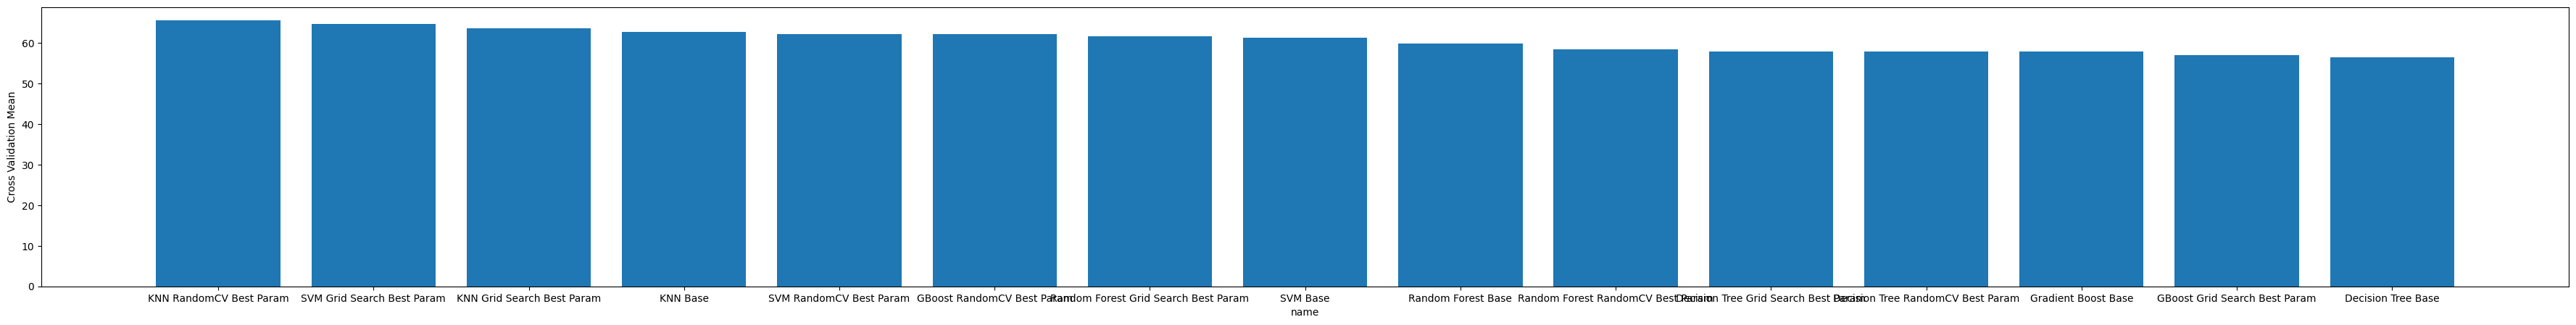

In [148]:
plt.figure(figsize=(45, 5))
plt.bar(Model_evaluation_df_sorted['name'], Model_evaluation_df_sorted['Cross Validation Mean'])
plt.xlabel('name')
plt.ylabel('Cross Validation Mean')
plt.show()

In the Cross Validation analysis which has been explained in the Model Evaluation (Base) chapter, it can be seen that the KNN model which has been hyperparameter tuned using RandomCV with the best parameters gets very high cross validation mean results from all the models that have been tested (score: 65.52%) . It is important to know that when the model is tested on some data, it will produce 6 to 7 actual and correct data out of 10 data when compared with 10 test data. This is very important because when data science provides algorithm models to schools, they must have very high accuracy

But keep in mind, the train - test results with the f1 Score matrix (also explained in the Model Evaluation (base) chapter) according to researchers have quite a wide range between Test - train. This causes the model to tend to underfit when tested.

After everything has been determined, the best model is KNN with RandomCV, the model will be saved and model inference will be carried out

## X Model Saving

In [149]:
rscv_KNN_Best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Student_Age',
                                                   'Weekly_Study_Hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('encodern',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'High_School_Type',
                                                   'Scholarship',
                                                   'Additional_Work',
                                                   'Sports_activity',
                                                   'Transportation',
                                                   'Attendance', 'Reading',
                                                   'Notes',
                                                   'Listening_in_Class',
                                                   'Project_work'])])),
                ('classifierKNN',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=3))])

In [150]:
with open('best_model.pkl', 'wb') as file_1:
    pickle.dump(rscv_KNN_Best, file_1)

## XI Model Inference

In [151]:
rscv_KNN_Best.predict(X_test) #Xtrain diganti data inference

array(['Fail', 'AA', 'BB', 'AA', 'BB', 'DD', 'BA', 'CB', 'CB', 'DC', 'AA',
       'AA', 'CC', 'BA', 'AA', 'CC', 'AA', 'AA', 'DD', 'DC', 'AA', 'BA',
       'CC', 'BA', 'BA', 'DD', 'AA', 'AA', 'CC', 'BB', 'BA', 'AA', 'BB',
       'AA', 'AA', 'DC'], dtype=object)

In [152]:
X_train.iloc[0].to_dict()

{'Student_Age': 18,
 'Sex': 'Female',
 'High_School_Type': 'State',
 'Scholarship': '50%',
 'Additional_Work': 'Yes',
 'Sports_activity': 'Yes',
 'Transportation': 'Bus',
 'Weekly_Study_Hours': 2,
 'Attendance': 'Sometimes',
 'Reading': 'No',
 'Notes': 'Yes',
 'Listening_in_Class': 'Yes',
 'Project_work': 'Yes'}

Inference codes do at inference.ipynb

## XII Model Deployment

Link Deployment At [Huggingface](https://huggingface.co/spaces/SyahrulRahmadan/FinalGradeScoringModel)

## XIII Business Analysis (EDA III)

In this chapter we will discuss the business analysis of the model that has been created and the impact on the business domain that will be created

The model that has been created will be imported and then tested with dummy data created by the author.


When checking the model and the predicted data, it can be displayed as follows

In [153]:
csv_file_path = 'dummy_test.csv' 
data_test_dummy = pd.read_csv(csv_file_path)
data_test_dummy

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Final Score
0,21,Male,Private,50%,No,Yes,Bus,1,Always,Yes,No,Yes,No,CC
1,19,Female,State,25%,No,Yes,Private,9,Sometimes,Yes,No,No,No,Fail
2,23,Female,Private,50%,No,No,Private,5,Always,Yes,Yes,Yes,No,CC
3,23,Female,Private,100%,No,No,Private,9,Sometimes,No,No,Yes,No,AA
4,24,Male,Private,75%,No,Yes,Bus,12,Always,No,Yes,No,No,DD
5,18,Male,Private,25%,No,No,Bus,20,Always,Yes,No,Yes,Yes,AA
6,21,Male,State,75%,Yes,No,Bus,13,Always,Yes,Yes,Yes,No,BA
7,19,Male,State,100%,No,No,Private,12,Always,Yes,No,No,Yes,BA
8,20,Female,State,50%,No,No,Private,19,Always,No,No,No,No,BA
9,19,Male,Private,50%,No,Yes,Bus,19,Always,Yes,Yes,No,No,AA


Berikut adalah dataframe awal dapat ditampilkan sebaga berikut

In [154]:
data_analisis = data.head(20)
data_analisis

,Id,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
5,5006,20,Male,State,50%,No,No,Private,2,Always,Yes,No,Yes,Yes,BA
6,5007,18,Male,State,75%,No,No,Private,0,Always,No,Yes,Yes,Yes,CC
7,5008,18,Female,State,50%,Yes,Yes,Bus,2,Sometimes,No,Yes,Yes,Yes,BA
8,5009,19,Female,Other,50%,No,Yes,Bus,0,Always,No,No,No,Yes,CC
9,5010,21,Female,State,50%,No,No,Bus,12,Never,No,Yes,No,No,Fail


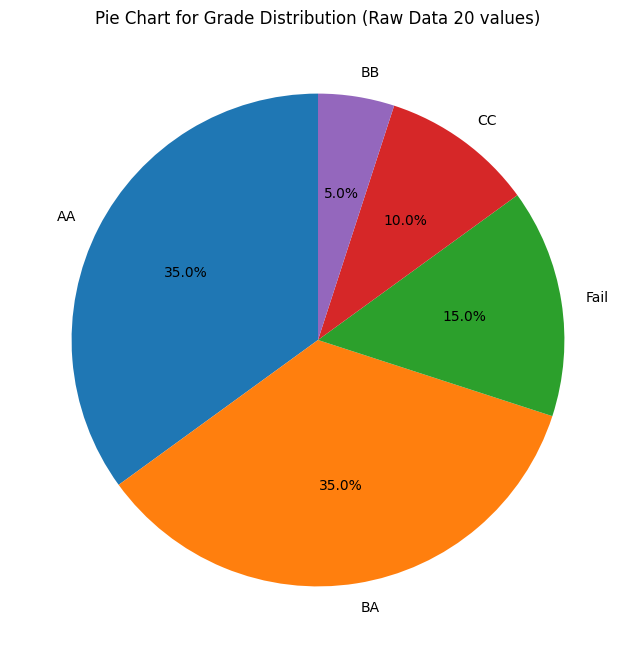

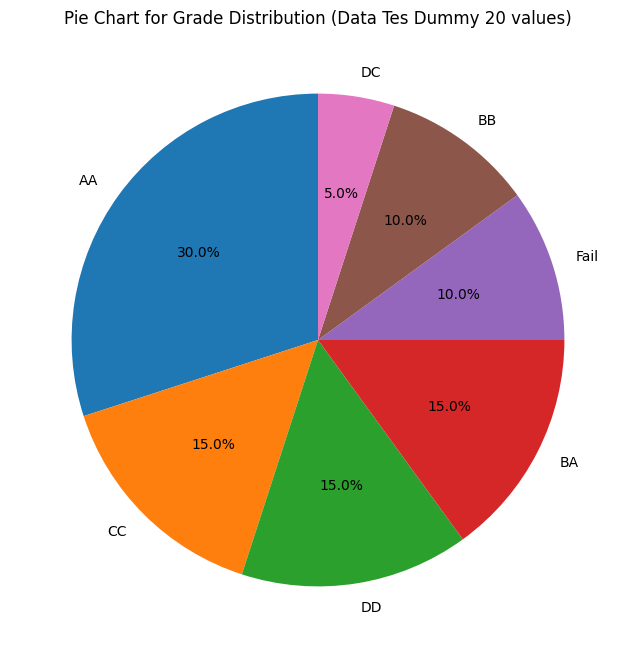

In [155]:
category_counts_y = data_analisis['Grade'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(category_counts_y, labels=category_counts_y.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for Grade Distribution (Raw Data 20 values)')

category_counts_y = data_test_dummy['Final Score'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(category_counts_y, labels=category_counts_y.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart for Grade Distribution (Data Tes Dummy 20 values)')

plt.show()

From the data presented by the pie plot, it is important to remember that the data that has been tested dummy is the result of testing by the model that has been created.


Here I will not compare the two pie plots because the results will definitely be different and not correlated, but I want to prove that the model has succeeded in making final value decisions on dummy data that has been created randomly using auto generated fill.

From this data, business ideas such as?
- Improved assessment performance at an educational institution
- Teachers only need to input grades and the model will automatically create the final result
- The final results of the assessment may be influenced by other positive habitual factors at an educational institution
- This will have a positive impact if the educational institution does not look at assessments only from raw scores but rather from the habits of a student (the model can develop continuously according to the wishes of the institution)

## XIV Conceptual Problems

### Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging, or Bootstrap Aggregating, is an ensemble learning technique designed to improve the stability and performance of machine learning models. The background to bagging and how it works is related to overcoming overfitting and model variability that can arise due to variations in the dataset.

Bagging involves random sampling with replacement (bootstrap sampling) from the original training dataset to form a subset of the training data that is proportional to the size of the original dataset.

Several independent models (learners) are built, each trained on a different subset of data resulting from bootstrap sampling. In this context, the model can be a decision tree, linear regression, or other type of model.

One popular implementation of bagging is Random Forest, where bagging is applied to decision trees. Random Forest builds a large number of independent decision trees and combines their predictions through majority voting.

### Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Random Forest and Gradient Boosting are two ensemble learning algorithms that are popularly used to improve the performance of machine learning models. Although both aim to overcome the weaknesses of single models and improve generalization, they work differently.

Random Forest : 
- Random Forest builds multiple decision trees independently. Each tree is built on a subset of data generated through bootstrap sampling, which involves random sampling with replacement from the training dataset.
- When making a prediction, the results of each tree are taken, and the final prediction is taken based on a majority vote of all the trees. In classification, this means selecting the class that gets the most votes, whereas in regression, this can be the average of tree predictions.

Gradient Boosting :
- Gradient Boosting builds decision trees sequentially. Each tree tries to correct the prediction errors of the previous model.
- The final prediction is generated by compiling the predictions from each tree. This process is done by assigning weights to each tree based on how good it is at reducing errors.

### Jelaskan apa yang dimaksud dengan Cross Validation !

Cross-validation is a machine learning model evaluation technique that is used to measure the extent to which the model can generalize on data that was not seen during training. The main goal of cross-validation is to provide a more accurate estimate of model performance on independent data than using just one data split for training and testing.

## XV Conclusion

Research Shortcomings
- Cross validation and train - test values do not fully prove the accuracy of the model even though the model can be used.
- Not using Multi-class Classification — One-vs-All for multi-class, this has a big impact on multiclass research
- The values in the dataset are small

Research Advantages
- Models can be created and can be implemented immediately
- Using the KNN base model and hyperparameter tuning with randomCV makes the model have improved learning performance
- Simulations are carried out to prove the model can work well

Suggestions from researchers
- Using OneVSAll Multiclass to wrap the evaluation model and its assessment metrics (for multiclass)
- Adding other research metrics to get a better model

From the research made, conclusions can be drawn:
1. By researching a suitable algorithm, a model can be created to assess the final value
2. Work time has been shortened for teachers in assessing their students
3. KNN with Random CV is the best algorithm in this project